In [1]:
import requests
import time

In [2]:
res = requests.get('https://api.quotable.io/random') # Get an array of quotes

In [3]:
res.status_code # Good request

200

In [4]:
res.headers # What is in the body of the request

{'Server': 'Cowboy', 'Report-To': '{"group":"heroku-nel","max_age":3600,"endpoints":[{"url":"https://nel.heroku.com/reports?ts=1712764031&sid=af571f24-03ee-46d1-9f90-ab9030c2c74c&s=kb7jBohnHanODKqg7LPjQ1qJNG3reO%2FL1i1HoG9pRi8%3D"}]}', 'Reporting-Endpoints': 'heroku-nel=https://nel.heroku.com/reports?ts=1712764031&sid=af571f24-03ee-46d1-9f90-ab9030c2c74c&s=kb7jBohnHanODKqg7LPjQ1qJNG3reO%2FL1i1HoG9pRi8%3D', 'Nel': '{"report_to":"heroku-nel","max_age":3600,"success_fraction":0.005,"failure_fraction":0.05,"response_headers":["Via"]}', 'Connection': 'keep-alive', 'X-Powered-By': 'Express', 'Access-Control-Allow-Origin': '*', 'Ratelimit-Limit': '220', 'Ratelimit-Remaining': '219', 'Ratelimit-Reset': '50', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '231', 'Etag': 'W/"e7-LcejJL6i8/3NKwLTybTmJE6N6TQ"', 'Date': 'Wed, 10 Apr 2024 15:47:11 GMT', 'Via': '1.1 vegur'}

In [5]:
res.text # The text of the request's body

'{"_id":"4iwVD9jYPBp","content":"Well done is better than well said.","author":"Benjamin Franklin","tags":["Famous Quotes","Success"],"authorSlug":"benjamin-franklin","length":35,"dateAdded":"2019-02-11","dateModified":"2023-04-14"}'

In [6]:
res.json() # The json of the request's body in python dictionary format

{'_id': '4iwVD9jYPBp',
 'content': 'Well done is better than well said.',
 'author': 'Benjamin Franklin',
 'tags': ['Famous Quotes', 'Success'],
 'authorSlug': 'benjamin-franklin',
 'length': 35,
 'dateAdded': '2019-02-11',
 'dateModified': '2023-04-14'}

In [7]:
res.json()['content'] # Grab particular pieces of content using dictionary keys

'Well done is better than well said.'

In [8]:
 # Use a query parameter to get a specific author
res = requests.get('https://api.quotable.io/random', params={"author": "Winston Churchill"})
res.json()['content']

'If we open a quarrel between past and present, we shall find that we have lost the future.'

In [9]:
res = requests.get('https://api.quotable.io/quotes') # List an array of quotes
print(res.json())

{'count': 20, 'totalCount': 2127, 'page': 1, 'totalPages': 107, 'lastItemIndex': 20, 'results': [{'_id': 'bfNpGC2NI', 'author': 'Thomas Edison', 'content': 'As a cure for worrying, work is better than whisky.', 'tags': ['Humorous'], 'authorSlug': 'thomas-edison', 'length': 51, 'dateAdded': '2023-04-14', 'dateModified': '2023-04-14'}, {'_id': 'ghVnmSpeAo', 'author': 'Thomas Edison', 'content': 'Everything comes to him who hustles while he waits.', 'tags': ['Success', 'Motivational'], 'authorSlug': 'thomas-edison', 'length': 51, 'dateAdded': '2023-04-14', 'dateModified': '2023-04-14'}, {'_id': '_92j6kAvwd', 'author': 'Thomas Edison', 'content': "I never did a day's work in my life.  It was all fun.", 'tags': ['Humorous'], 'authorSlug': 'thomas-edison', 'length': 53, 'dateAdded': '2023-04-14', 'dateModified': '2023-04-14'}, {'_id': 'RTYhCs5Ka', 'author': 'Charles Dickens', 'content': 'I do not know the American gentleman, god forgive me for putting two such words together.', 'tags': ['Hum

In [10]:
import requests

try:
    res = requests.get("https://api.quotable.io/quotes", params={"page": 2}) # Access a particular page with a parameter
    res.raise_for_status()  # Raise an error for bad responses (e.g., 404, 500)
    data = res.json()  # Parse response JSON
    print(data)  # Print the parsed JSON data
except requests.RequestException as e:
    print("Error fetching data:", e)

{'count': 20, 'totalCount': 2127, 'page': 2, 'totalPages': 107, 'lastItemIndex': 40, 'results': [{'_id': 'XtZMaD2s28', 'author': 'Thomas Edison', 'content': 'If we all did the things we are capable of doing, we would literally astound ourselves.', 'tags': ['Inspirational', 'Motivational'], 'authorSlug': 'thomas-edison', 'length': 87, 'dateAdded': '2023-04-14', 'dateModified': '2023-04-14'}, {'_id': 'niVz2fQWSH', 'author': 'Thomas Edison', 'content': 'Opportunity is missed by most people because it is dressed in overalls and looks like work.', 'tags': ['Opportunity', 'Work'], 'authorSlug': 'thomas-edison', 'length': 91, 'dateAdded': '2023-04-14', 'dateModified': '2023-04-14'}, {'_id': 'mg8F-nsmPEj', 'author': 'Albert Einstein', 'content': "Only two things are infinite, the universe and human stupidity, and I'm not sure about the former.", 'tags': ['Stupidity'], 'authorSlug': 'albert-einstein', 'length': 98, 'dateAdded': '2023-04-06', 'dateModified': '2023-04-14'}, {'_id': 'EG9yQpz6Ku', 

In [22]:
import requests
import time

quotes = []  # Create an empty list to store quotes
for page in range(1, 10):  # Loop through the first 10 pages
    res = requests.get("https://api.quotable.io/quotes", params={"page": page})  # Access a particular page with a parameter
    quotes.extend(res.json()['results'])  # Append the data that is in the results field
    time.sleep(1)  # Increase delay to 1 second between requests

In [14]:
import pandas as pd

In [23]:
df = pd.DataFrame.from_records(quotes) # Create a pandas dataframe from the list of quotes
df # Display the dataframe

,_id,author,content,tags,authorSlug,length,dateAdded,dateModified
0,bfNpGC2NI,Thomas Edison,"As a cure for worrying, work is better than wh...",[Humorous],thomas-edison,51,2023-04-14,2023-04-14
1,ghVnmSpeAo,Thomas Edison,Everything comes to him who hustles while he w...,"[Success, Motivational]",thomas-edison,51,2023-04-14,2023-04-14
2,_92j6kAvwd,Thomas Edison,I never did a day's work in my life. It was a...,[Humorous],thomas-edison,53,2023-04-14,2023-04-14
3,RTYhCs5Ka,Charles Dickens,"I do not know the American gentleman, god forg...",[Humorous],charles-dickens,89,2023-04-14,2023-04-14
4,RKl9iZrjfP,Charles Dickens,We need never be ashamed of our tears.,[Sadness],charles-dickens,38,2023-04-14,2023-04-14
...,...,...,...,...,...,...,...,...
175,vtzyn3LKIA,Wayne Gretzky,A good hockey player plays where the puck is. ...,"[Sports, Competition]",wayne-gretzky,104,2022-07-06,2023-04-14
176,Rqv9duD-Lc,Barry Switzer,Some people are born on third base and go thro...,"[Sports, Competition]",barry-switzer,82,2022-07-06,2023-04-14
177,wNd1PnDiIN,Bob Feller,Every day is a new opportunity. You can build ...,"[Sports, Competition]",bob-feller,200,2022-07-06,2023-04-14
178,yq5LCWQjDJU,Niccolò Machiavelli,No enterprise is more likely to succeed than o...,[Business],niccolo-machiavelli,105,2022-07-06,2023-04-14


In [15]:
res = requests.get("https://api.open-meteo.com/v1/forecast",params={"latitude":52.52,"longitude":13.41,"hourly":"temperature_2m"}) # Get the weather forecast

In [16]:
df = pd.DataFrame.from_records(res.json()['hourly']) # Create a pandas dataframe from the list of temperature data
df.set_index('time', inplace=True) # Set the time as the index
df # Display the timeseries dataset

,temperature_2m
time,
2024-04-10T00:00,11.4
2024-04-10T01:00,11.1
2024-04-10T02:00,11.1
2024-04-10T03:00,11.1
2024-04-10T04:00,11.0
...,...
2024-04-16T19:00,6.7
2024-04-16T20:00,5.9
2024-04-16T21:00,5.3


<Axes: xlabel='time'>

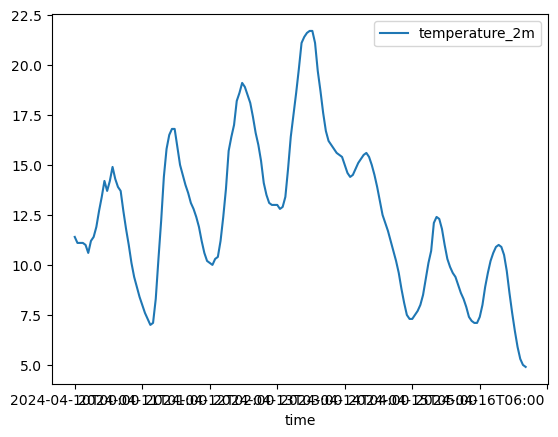

In [17]:
df.plot() # Plot the timeseries data

In [21]:
key = open("./apikey").read() # Read the API key from a file
base_url = "https://www.alphavantage.co/query" # Base URL for the API
symbol="IBM" # Stock symbol for IBM
params={"function":"TIME_SERIES_INTRADAY","symbol":symbol,"interval":"5min","apikey":key} # Parameters for the API
stock_res = requests.get(base_url, params=params) # Get the stock data
print(stock_res.json()) # Print the stock data

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2024-04-09 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-04-09 19:55:00': {'1. open': '189.3100', '2. high': '189.4500', '3. low': '189.3100', '4. close': '189.3300', '5. volume': '8'}, '2024-04-09 19:50:00': {'1. open': '189.4600', '2. high': '189.4600', '3. low': '189.4500', '4. close': '189.4500', '5. volume': '9'}, '2024-04-09 19:40:00': {'1. open': '189.4500', '2. high': '189.4500', '3. low': '189.4500', '4. close': '189.4500', '5. volume': '5'}, '2024-04-09 19:25:00': {'1. open': '189.5000', '2. high': '189.5000', '3. low': '189.5000', '4. close': '189.5000', '5. volume': '2'}, '2024-04-09 19:20:00': {'1. open': '189.4000', '2. high': '189.4000', '3. low': '189.4000', '4. close': '189.4000', '5. volume': '5'}, '2024-04-09 19:05:00': {'1. open': '189.3100', '2. high': '189

In [24]:
df = pd.DataFrame.from_records(stock_res.json()['Time Series (5min)']).T # Create a transposed pandas dataframe from the stock data
df

,1. open,2. high,3. low,4. close,5. volume
2024-04-09 10:35:00,188.0800,188.1300,187.6900,187.7100,55106
2024-04-09 10:40:00,187.7700,187.8100,187.2200,187.3400,36261
2024-04-09 10:45:00,187.4300,187.4700,187.0200,187.1000,21056
2024-04-09 10:50:00,187.0500,187.2800,186.9200,186.9510,52261
2024-04-09 10:55:00,186.9800,187.0900,186.8800,187.0400,36950
...,...,...,...,...,...
2024-04-09 19:20:00,189.4000,189.4000,189.4000,189.4000,5
2024-04-09 19:25:00,189.5000,189.5000,189.5000,189.5000,2
2024-04-09 19:40:00,189.4500,189.4500,189.4500,189.4500,5
2024-04-09 19:50:00,189.4600,189.4600,189.4500,189.4500,9
